# Uber Rides Analysis using Python

Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data

In [5]:
df = pd.read_csv("C:/Users/tamir/OneDrive/Documents/Bootcamp/Uber_Analysis/Uber_Data.csv")

First Five rows from the Dataframe

In [7]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


To find shape of the data

In [9]:
df.shape

(1156, 7)

In [10]:
df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

To understand the data more deeply, we need to know about the null values count, datatype, etc. So for that we will use the below code.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Check the Missing Values

In [14]:
df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

Count of the Missing Values from each column

In [16]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [17]:
#As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword. You can try something else too
df.fillna({'PURPOSE*':"Not"}, inplace = True)

In [18]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [19]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],errors = 'coerce')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], errors = 'coerce')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

In [22]:
df['date'] = df['START_DATE*'].dt.date
df['time'] = df['START_DATE*'].dt.time
df['hour'] = df['START_DATE*'].dt.hour
df['day-night'] = pd.cut(x = df['hour'],
                         bins = [0, 10, 15, 19, 24],
                         labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

In [23]:
df.dropna(inplace=True)

Dropping the rows with duplicate values

In [25]:
df.drop_duplicates(inplace=True)

Data Visualization

In [27]:
#checking the unique values in dataset of the columns with object datatype.

obj = (df.dtypes == 'object')
obj_cols = list(obj[obj].index)

unique_values = {}
for col in obj_cols:
    unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY*': 2,
 'START*': 175,
 'STOP*': 186,
 'PURPOSE*': 11,
 'date': 291,
 'time': 672}

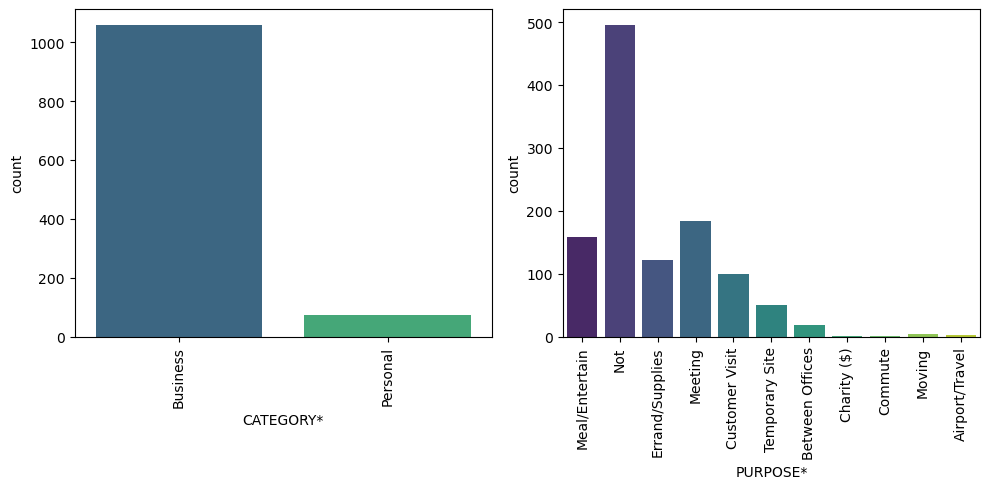

In [28]:
#using matplotlib and seaborn library for countplot the CATEGORY and PURPOSE columns.

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CATEGORY*', hue = 'CATEGORY*', data = df, palette='viridis')
plt.xticks(rotation=90)


plt.subplot(1,2,2)
sns.countplot(x='PURPOSE*', hue ='PURPOSE*',data = df, palette='viridis')
plt.xticks(rotation=90)

plt.tight_layout()  # Ensures no overlap between subplots
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

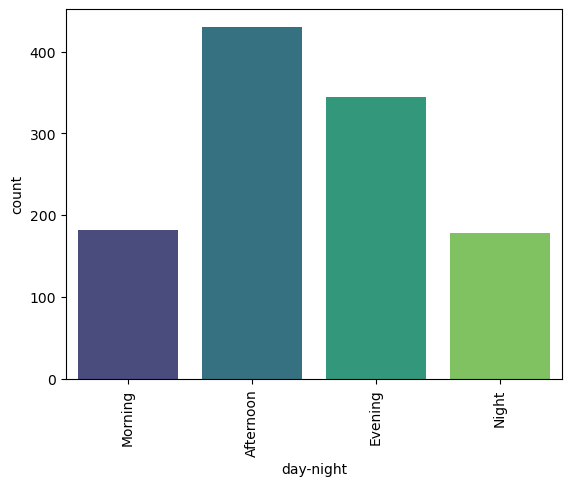

In [29]:
#applying the same to the day-night

sns.countplot(x = 'day-night', data = df, hue = 'day-night', palette = 'viridis')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Not'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Charity ($)'),
  Text(8, 0, 'Commute'),
  Text(9, 0, 'Moving'),
  Text(10, 0, 'Airport/Travel')])

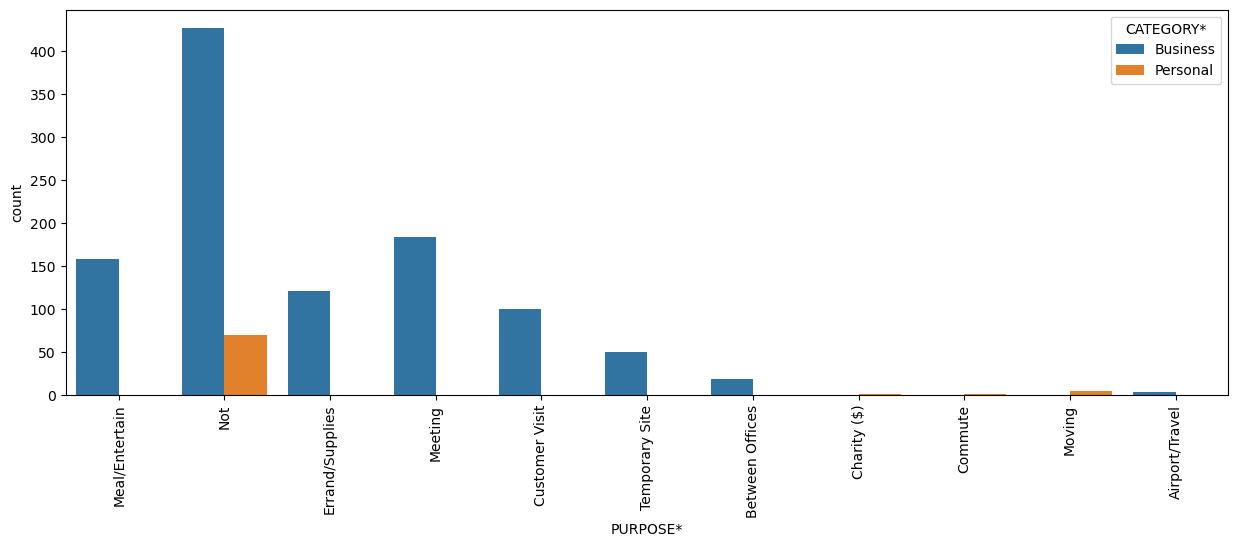

In [30]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'PURPOSE*', hue = 'CATEGORY*', data = df)
plt.xticks(rotation = 90)

In [53]:
from sklearn.preprocessing import OneHotEncoder
obj_cols = ['CATEGORY*', 'PURPOSE*']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[obj_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(obj_cols, axis=1)
df = pd.concat([df_final, OH_cols], axis=1)

<Axes: >

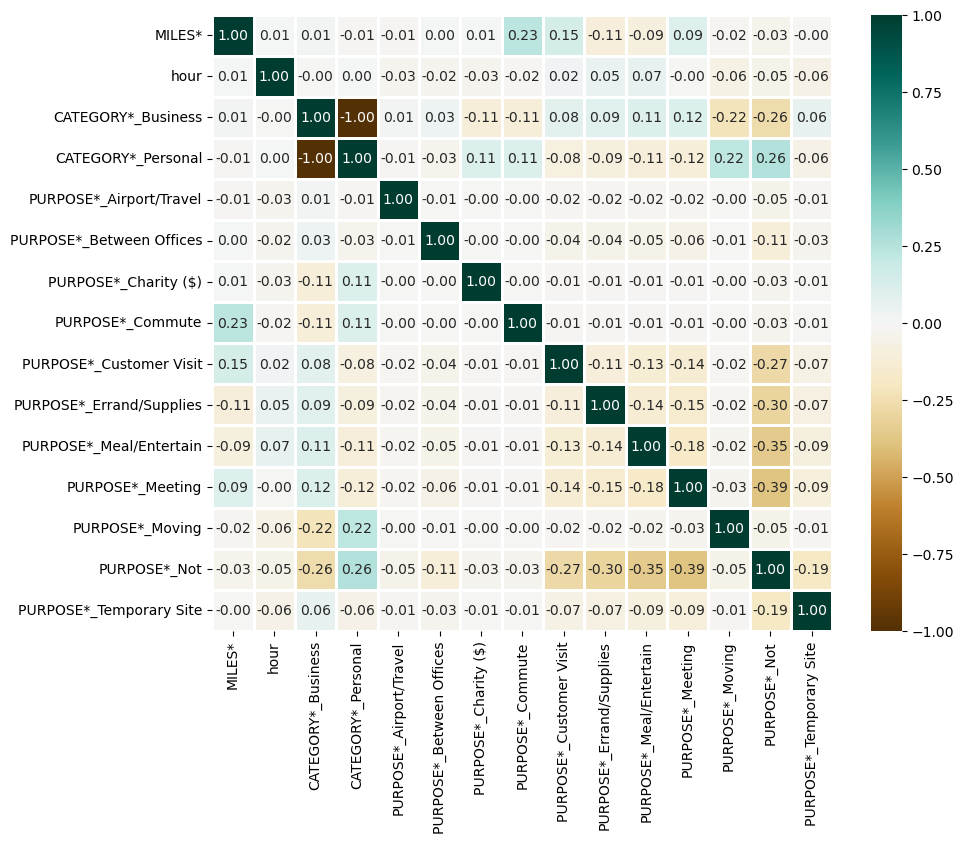

In [71]:
#the correlation between the columns using heatmap.

numeric_df = df.select_dtypes(include = ['number'])
plt.figure(figsize = (10,8))
sns.heatmap(numeric_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

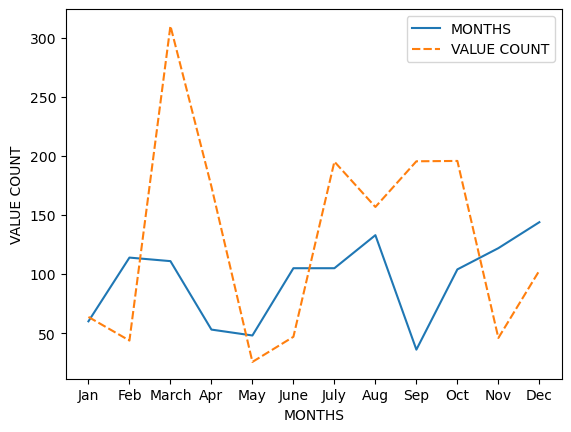

In [83]:
#Visualization for month data
df['MONTH'] = df['START_DATE*'].dt.month

month_label = {1.0:'Jan', 2.0:'Feb', 3.0:'March', 4.0:'Apr', 5.0:'May', 6.0:'June',
                7.0:'July', 8.0:'Aug', 9.0:'Sep', 10.0:'Oct', 11.0:'Nov', 12.0:'Dec'}
df['MONTH'] = df.MONTH.map(month_label)

mon = df.MONTH.value_counts(sort = False)

df_1 = pd.DataFrame({'MONTHS':mon.values,
                   'VALUE COUNT': df.groupby('MONTH',
                                             sort = False)['MILES*'].max()})

p = sns.lineplot(data = df_1)
p.set(xlabel = 'MONTHS', ylabel = 'VALUE COUNT')

In [85]:
#Visualization for days data

df['Day'] = df['START_DATE*'].dt.weekday

day_label = {
    0:'Mon', 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day'] = df['Day'].map(day_label)

Text(0, 0.5, 'Count')

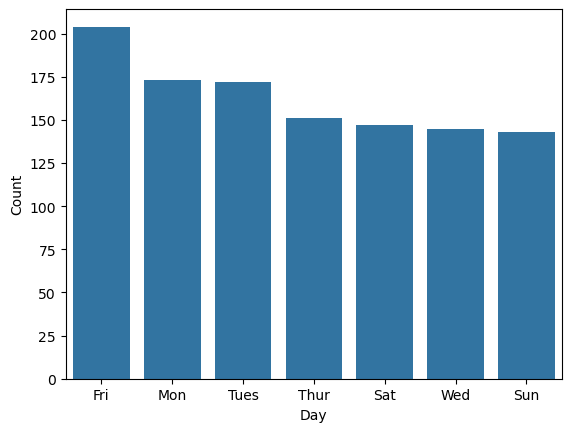

In [87]:
day_label = df['Day'].value_counts()
sns.barplot(x = day_label.index, y = day_label)
plt.xlabel('Day')
plt.ylabel('Count')

<Axes: ylabel='MILES*'>

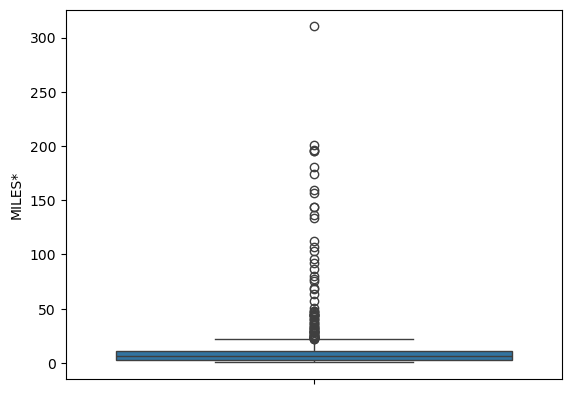

In [89]:
sns.boxplot(df['MILES*'])

<Axes: ylabel='MILES*'>

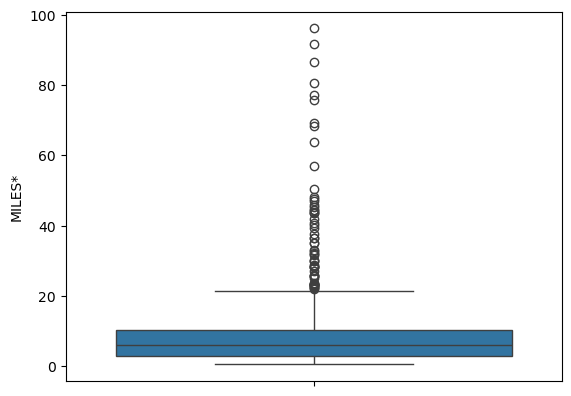

In [93]:
sns.boxplot(df[df['MILES*']<100]['MILES*'])

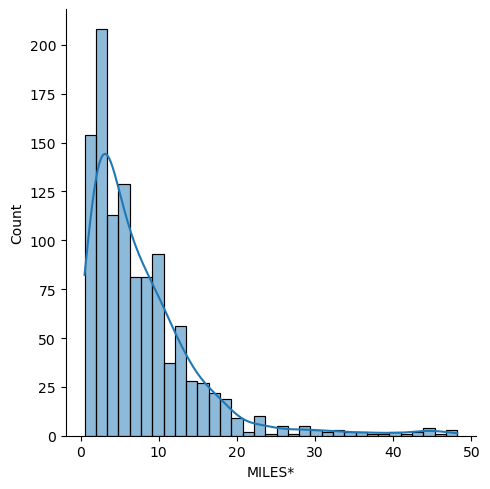

In [97]:
sns.displot(data = df[df['MILES*']<50], x = 'MILES*', kde = True)